In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
%load_ext autoreload
%autoreload 3

In [14]:
ds = xr.open_mfdataset('/scratch/pp2681/pyqg_generative/Reference-Default-scaled/eddy/Operator2-64-dealias/[0-5].nc', combine='nested', concat_dim='run')

In [15]:
from pyqg_generative.models.ann_model import ANNModel

In [16]:
net = ANNModel()

In [17]:
net.fit(ds,ds)

Training starts on device cpu, number of samples 4227072
[1/50] [3.10/151.73] Loss: [1.012, 0.990]
[2/50] [3.97/169.56] Loss: [0.974, 0.953]
[3/50] [4.44/180.23] Loss: [0.942, 0.935]
[4/50] [2.58/162.02] Loss: [0.929, 0.923]
[5/50] [2.23/146.91] Loss: [0.918, 0.912]
[6/50] [3.24/143.47] Loss: [0.907, 0.902]
[7/50] [3.11/139.31] Loss: [0.898, 0.893]
[8/50] [3.15/135.59] Loss: [0.890, 0.886]
[9/50] [3.37/133.01] Loss: [0.883, 0.879]
[10/50] [3.81/132.03] Loss: [0.877, 0.873]
[11/50] [3.28/128.65] Loss: [0.871, 0.868]
[12/50] [3.31/125.38] Loss: [0.866, 0.863]
[13/50] [2.93/121.03] Loss: [0.861, 0.859]
[14/50] [3.59/118.57] Loss: [0.857, 0.854]
[15/50] [4.21/117.42] Loss: [0.853, 0.851]
[16/50] [3.29/113.92] Loss: [0.849, 0.848]
[17/50] [3.95/111.73] Loss: [0.846, 0.845]
[18/50] [3.08/107.80] Loss: [0.844, 0.842]
[19/50] [3.64/104.88] Loss: [0.842, 0.840]
[20/50] [2.82/100.65] Loss: [0.840, 0.839]
[21/50] [2.99/96.79] Loss: [0.838, 0.837]
[22/50] [3.03/93.07] Loss: [0.836, 0.835]
[23/50] 

In [50]:
pred = net.predict(ds).q_forcing_advection
true = ds.q_forcing_advection

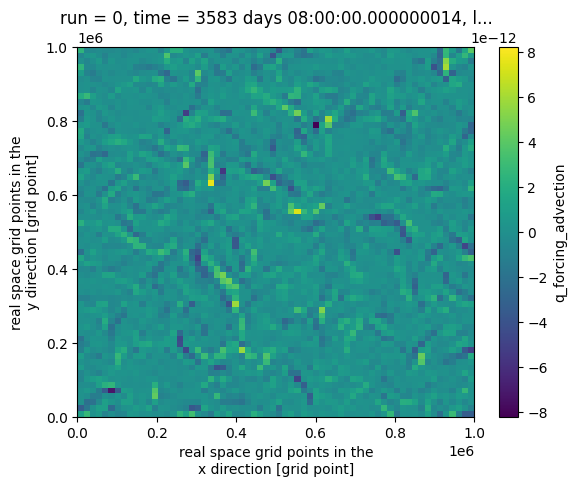

In [51]:
pred.isel(lev=0,run=0,time=-1).plot(cmap='viridis')

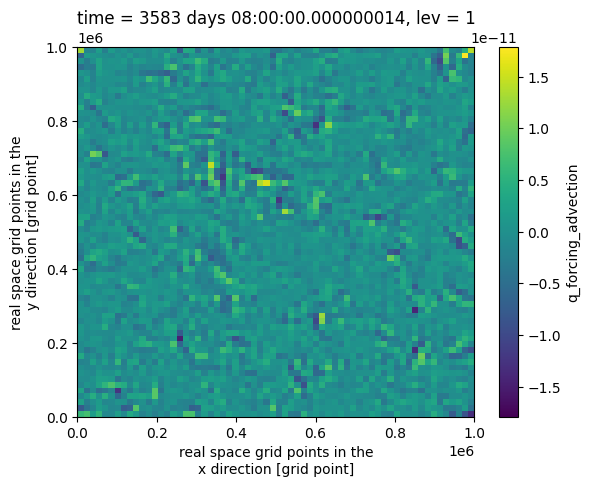

In [52]:
true.isel(lev=0,run=0,time=-1).plot(cmap='viridis')

In [53]:
float(((pred-true)**2).mean() / (true**2).mean())

0.8292166179179811

In [54]:
import pyqg
m = pyqg.QGModel()

INFO:  Logger initialized


In [55]:
m.q = ds.q.isel(run=0,time=-1).values.astype('float64')

In [57]:
np.linalg.norm(net.predict_snapshot(m,None) - pred.isel(run=0,time=-1))

0.0